# **LSTM Exercise**

## Import libraries

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [71]:
dataframe = pd.read_csv('/content/traffic (2).csv')

In [72]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [73]:
df['year'] = pd.DatetimeIndex(df['DateTime']).year
df['month'] = pd.DatetimeIndex(df['DateTime']).month
df['day'] = pd.DatetimeIndex(df['DateTime']).day
df['hour'] = pd.DatetimeIndex(df['DateTime']).hour
df['minute'] = pd.DatetimeIndex(df['DateTime']).minute
df['second'] = pd.DatetimeIndex(df['DateTime']).second

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  float64       
 2   Vehicles  48120 non-null  float64       
 3   ID        48120 non-null  int64         
 4   year      48120 non-null  int32         
 5   month     48120 non-null  int32         
 6   day       48120 non-null  int32         
 7   hour      48120 non-null  int32         
 8   minute    48120 non-null  int32         
 9   second    48120 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(6), int64(1)
memory usage: 2.6 MB


## Normalize the dataset

In [75]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Vehicles'] = scaler.fit_transform(df['Vehicles'].values.reshape(-1,1))
df['Junction'] = scaler.fit_transform(df['Junction'].values.reshape(-1,1))

## split into train and test sets

In [76]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

32240 15880


In [77]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]  # Indent this line
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [85]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [79]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [80]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model.fit(trainX,trainY, epochs=50, batch_size=32, verbose=2)


Epoch 1/50
1008/1008 - 3s - 3ms/step - loss: 0.0080
Epoch 2/50
1008/1008 - 3s - 3ms/step - loss: 9.0235e-05
Epoch 3/50
1008/1008 - 2s - 2ms/step - loss: 3.2565e-05
Epoch 4/50
1008/1008 - 2s - 2ms/step - loss: 1.0170e-05
Epoch 5/50
1008/1008 - 3s - 3ms/step - loss: 7.1326e-06
Epoch 6/50
1008/1008 - 1s - 1ms/step - loss: 7.1277e-06
Epoch 7/50
1008/1008 - 3s - 3ms/step - loss: 7.2377e-06
Epoch 8/50
1008/1008 - 3s - 3ms/step - loss: 7.3161e-06
Epoch 9/50
1008/1008 - 2s - 2ms/step - loss: 7.3792e-06
Epoch 10/50
1008/1008 - 2s - 2ms/step - loss: 7.4076e-06
Epoch 11/50
1008/1008 - 1s - 1ms/step - loss: 7.4157e-06
Epoch 12/50
1008/1008 - 1s - 1ms/step - loss: 7.4177e-06
Epoch 13/50
1008/1008 - 3s - 3ms/step - loss: 7.4178e-06
Epoch 14/50
1008/1008 - 3s - 3ms/step - loss: 7.4174e-06
Epoch 15/50
1008/1008 - 2s - 2ms/step - loss: 7.4168e-06
Epoch 16/50
1008/1008 - 1s - 1ms/step - loss: 7.4162e-06
Epoch 17/50
1008/1008 - 1s - 1ms/step - loss: 7.4156e-06
Epoch 18/50
1008/1008 - 3s - 3ms/step - loss

## Make preductuion and evaluatuin matrix.

In [82]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train Score: 0.00 RMSE
Test Score: 0.02 RMSE


## Visualize the result

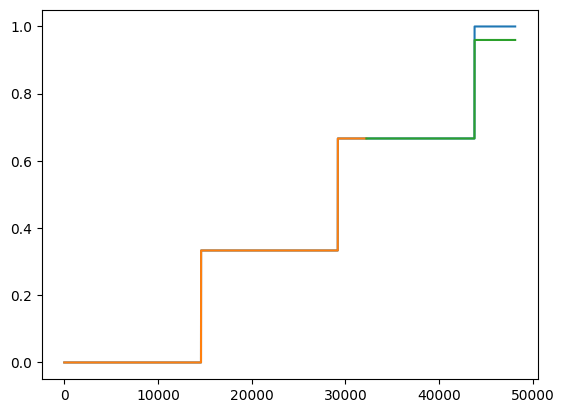

In [83]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# **Well done** :)